In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from graph import draw
import numpy as np
df = pd.read_pickle('../data/raw/swedish_stocks')
tickers = df.columns.get_level_values(0).unique()
df.columns.get_level_values(1).unique()
df.index = pd.to_datetime(df.index).strftime("%Y-%m-%d")

In [91]:
close = df.loc[:,(slice(None), 'Close')]
close.columns.get_level_values(0)

log_returns = np.log(pd.DataFrame(close.values, index = close.index, columns=close.columns.get_level_values(0))).diff()
missingDataPerLine = log_returns.isnull().sum(axis=0) -1 
#(log_returns[log_returns.isnull()].notnull().sum()>0)
print(missingDataPerLine[missingDataPerLine > 0].index)
hej = log_returns.drop(columns=missingDataPerLine[missingDataPerLine > 0].index, axis=1).dropna()
hej


Index(['SIMRIS-B.ST', 'VBG-B.ST', 'CRAD-B.ST', 'REJL-B.ST', 'BALD-B.ST',
       'MSON-B.ST', 'CMOTEC-B.ST', 'FOOT-B.ST', 'TRAC-B.ST', 'HOLM-B.ST',
       ...
       'BETS-B.ST', 'DEFL-B.ST', 'COPP-B.ST', 'PENG-B.ST', 'SJR-B.ST',
       'MSAB-B.ST', 'IBT-B.ST', 'STEF-B.ST', 'CAT-B.ST', 'XANO-B.ST'],
      dtype='object', length=120)


,ANOD-B.ST,MTG-B.ST,FING-B.ST,GETI-B.ST,MIDW-B.ST,VSSAB-B.ST,SVOL-B.ST,SCA-B.ST,SWOL-B.ST,NET-B.ST,...,SWEC-B.ST,NOLA-B.ST,SKF-B.ST,KINV-B.ST,WALL-B.ST,BERG-B.ST,BEIA-B.ST,TEL2-B.ST,NETI-B.ST,ELUX-B.ST
2009-12-02,-0.016950,0.003804,0.021310,-0.020927,0.000000,0.000000,-0.030772,0.001044,0.010580,0.047253,...,-0.028171,0.004246,0.004246,-0.009179,0.004174,0.015113,-0.002774,0.012669,-0.016702,-0.003495
2009-12-03,0.008511,0.030832,-0.018238,-0.006359,-0.013245,0.038548,-0.004474,-0.005206,-0.005273,-0.015498,...,0.000000,-0.021414,-0.011935,-0.011588,-0.021055,-0.020202,-0.002782,0.006270,0.016702,-0.016471
2009-12-04,0.016807,0.005507,0.024244,-0.003555,-0.008032,0.084556,0.017778,0.005206,0.000000,-0.015752,...,0.009480,0.004320,-0.003436,0.011588,0.006362,-0.010256,0.002782,-0.000890,0.002068,0.025763
2009-12-07,0.008299,0.005477,-0.006006,-0.003559,0.008032,-0.043399,-0.017778,-0.009391,0.000000,-0.036368,...,-0.019049,0.000000,0.000860,0.011456,-0.008489,0.000000,0.005540,0.000000,0.030521,0.010923
2009-12-08,0.008230,-0.005477,-0.006042,-0.004298,-0.024293,-0.036965,0.000000,-0.001049,0.002637,0.004110,...,0.000000,0.008584,-0.015598,-0.016067,0.006376,-0.010364,-0.005540,-0.013513,-0.008048,-0.016720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25,-0.032986,0.020203,-0.027534,0.017954,0.000000,0.013245,0.015639,0.011971,-0.001089,0.000000,...,-0.002990,0.015311,0.022850,0.010073,0.006551,0.003674,-0.004522,0.003535,0.015268,0.014975
2019-11-26,0.000000,0.017026,0.013862,0.028072,-0.013831,-0.006601,0.020479,-0.005663,-0.001090,0.005820,...,0.011905,0.029015,0.008132,0.019847,0.014815,-0.004902,0.019447,-0.004598,-0.030772,0.003298
2019-11-27,-0.037271,-0.006976,0.049244,-0.002309,-0.019691,0.001324,-0.005080,-0.016773,0.000000,0.003861,...,-0.002963,-0.009268,-0.016606,-0.010326,-0.001840,-0.021106,0.001480,0.010578,-0.017734,-0.007435
2019-11-28,0.015699,0.002497,0.016000,-0.027543,0.063295,0.000000,0.000000,-0.007661,0.003266,-0.017493,...,0.011800,-0.010295,0.013090,-0.005430,-0.003690,0.001254,-0.002963,-0.002458,-0.005982,0.003311


In [92]:
import rpy2.robjects as robjects
r = robjects.r

#importr("data.table")
newfunc=r.source("libClusteringGiadaMarsiliFast.R")
aggregateClusters=robjects.globalenv["aggregateClusters"]

import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

C=hej.corr()
myres=aggregateClusters(C.values)

In [93]:
myres[3]
for i in range(len(myres[3])):
    print(tickers[myres[3][i]])

Index(['SIMRIS-B.ST', 'VBG-B.ST', 'REJL-B.ST', 'CMOTEC-B.ST', 'HOLM-B.ST',
       'CCOR-B.ST', 'NIBE-B.ST', 'VSSAB-B.ST', 'AGES-B.ST', 'GETI-B.ST',
       'CLS-B.ST', 'TRIAN-B.ST', 'VIT-B.ST', 'NET-B.ST', 'DURC-B.ST',
       'MIDW-B.ST', 'SWOL-B.ST', 'MMGR-B.ST', 'MSON-B.ST', 'AJA-B.ST',
       'SCA-B.ST', 'VERT-B.ST', 'THQN-B.ST', 'SECT-B.ST', 'PROF-B.ST',
       'NTEK-B.ST', 'TRAC-B.ST', 'ORTI-B.ST'],
      dtype='object')
Index(['CRAD-B.ST', 'FOOT-B.ST', 'ELOS-B.ST', 'SAAB-B.ST', 'DMYD-B.ST',
       'CONS-B.ST', 'MACK-B.ST', 'FING-B.ST', 'BALD-B.ST'],
      dtype='object')
Index(['MTG-B.ST'], dtype='object')
Index(['SVOL-B.ST', 'ATVEXA-B.ST'], dtype='object')
Index(['PCOM-B.ST'], dtype='object')


In [90]:
C

,ANOD-B.ST,SIMRIS-B.ST,VBG-B.ST,CRAD-B.ST,REJL-B.ST,BALD-B.ST,MTG-B.ST,MSON-B.ST,CMOTEC-B.ST,TRAC-B.ST,...,BEIA-B.ST,SJR-B.ST,MSAB-B.ST,IBT-B.ST,STEF-B.ST,CAT-B.ST,TEL2-B.ST,NETI-B.ST,XANO-B.ST,ELUX-B.ST
ANOD-B.ST,1.000000,0.010550,0.081890,0.162034,0.064729,0.147164,0.128882,-0.046666,0.086301,0.095352,...,0.119495,0.112907,-0.050883,0.043737,0.057884,0.133139,0.181850,0.133358,0.127575,0.209890
SIMRIS-B.ST,0.010550,1.000000,0.044955,0.000343,0.022319,0.053762,0.023134,0.005803,0.000103,0.085983,...,0.018701,-0.008465,0.119792,0.072291,0.039158,0.087513,-0.017307,-0.011094,0.005920,0.076590
VBG-B.ST,0.081890,0.044955,1.000000,0.015439,0.054440,0.164221,0.046264,0.014145,0.047906,0.067032,...,0.169061,0.081541,0.077546,0.080238,0.085916,0.081429,0.125790,0.126863,0.075513,0.163400
CRAD-B.ST,0.162034,0.000343,0.015439,1.000000,0.095584,0.067324,0.103808,0.055199,0.065033,0.039694,...,0.118020,0.051356,0.063203,0.059463,0.117337,0.094347,0.092901,0.177971,0.075058,0.099935
REJL-B.ST,0.064729,0.022319,0.054440,0.095584,1.000000,0.084119,0.061934,0.037025,0.086807,0.073873,...,0.141352,0.031044,-0.003999,0.100003,0.132956,0.110680,0.052408,0.157362,0.120587,0.108678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAT-B.ST,0.133139,0.087513,0.081429,0.094347,0.110680,0.090377,0.033162,0.110491,-0.058110,0.080392,...,0.037836,0.067946,0.002498,0.013826,0.094061,1.000000,0.041326,-0.022393,0.041092,0.083445
TEL2-B.ST,0.181850,-0.017307,0.125790,0.092901,0.052408,0.249502,-0.003534,-0.002935,0.084214,0.084972,...,0.189327,0.081019,0.038754,0.065303,0.145550,0.041326,1.000000,0.064050,0.145288,0.194162
NETI-B.ST,0.133358,-0.011094,0.126863,0.177971,0.157362,0.073661,0.097858,0.029872,0.089867,0.085581,...,0.170726,0.087672,0.132372,-0.006094,0.057095,-0.022393,0.064050,1.000000,0.028410,0.085435
XANO-B.ST,0.127575,0.005920,0.075513,0.075058,0.120587,0.054548,0.119378,0.080388,-0.022036,0.107446,...,0.175608,0.154815,0.024394,0.100479,0.053344,0.041092,0.145288,0.028410,1.000000,0.119677


Evaluation of strategy
Gain: 2100.878189086914 kr 
Avg gain: 42.01756378173828 kr/trade
    Total gain: 8136.005289077759
    Total loss: -6035.127099990845
Num trades: 50
    Num pos trades: 37
    Num neg trades: 13


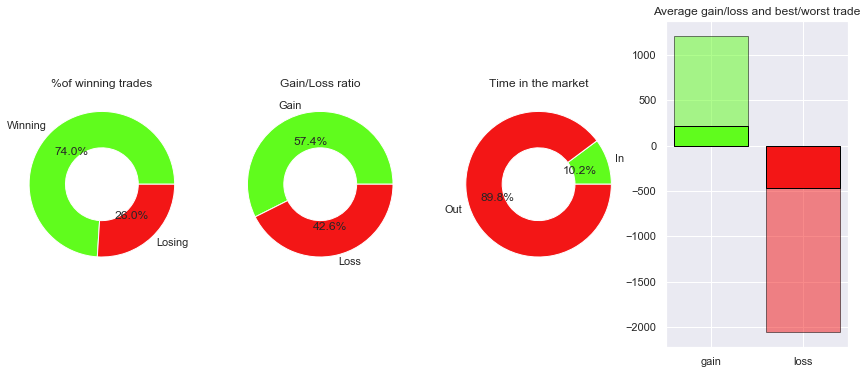

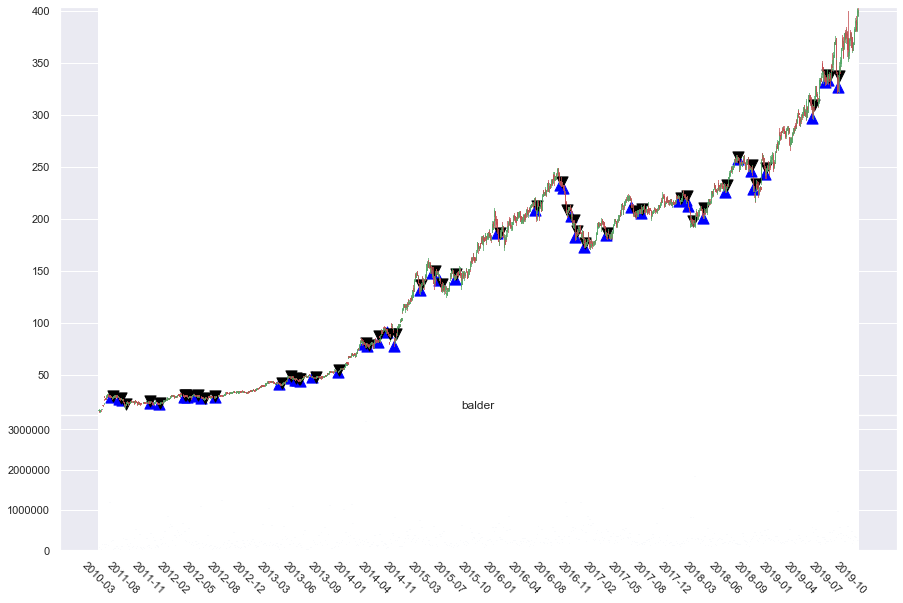

{'avg_result': 42.01756378173828,
 'num_trades': 50,
 'num_pos_trades': 37,
 'num_neg_trades': 13,
 'total_gain': 8136.005289077759,
 'total_loss': -6035.127099990845,
 'gain': 2100.878189086914,
 'best_trade': 1207.5,
 'worst_trade': -2058.5707607269287,
 'time_in_market': 0.1019036954087346,
 'trades':     portfolio_value       result  trade_duration
 0      10422.668152   422.668152             5.0
 1      10387.383892   -35.284260            10.0
 2       8328.813131 -2058.570761            14.0
 3       8694.584387   365.771255             1.0
 4       9218.301619   523.717232             4.0
 5       9478.498749   260.197130             4.0
 6       9626.285004   147.786255             1.0
 7       9688.725212    62.440208            11.0
 8       9688.725212     0.000000             8.0
 9       9527.083996  -161.641216            15.0
 10      9774.625462   247.541466             3.0
 11      9839.467663    64.842201            14.0
 12     10029.741680   190.274017            

In [60]:
import talib
from imp import reload
import helpers
import strats
reload(strats)
import strats
import graph
reload(graph)
from graph import draw
import seaborn as sns; sns.set()

data = df['BALD-B.ST'].dropna().copy()#.iloc[500:1500,:]
data['ma3'] = talib.SMA(data.Close, timeperiod=3)
roll_data = data.iloc[::-1]
data['signal'] = helpers.roll(roll_data, 9).apply(strats.twitter_price_action)
data.dropna(inplace=True)
#draw(elos, title='Elos')
result = strats.evaluate_strat(data)
strats.print_evaluation(result)
draw(data, title='balder')
result

In [5]:
elos.reset_index().index[elos['signal'] == 1]
elos.drop(elos[(elos['signal'] != 1) & (elos['signal'] != -1)].index, axis=0)
result['gain']

875.8497581481934

In [306]:
elos.index[0]

'2010-09-17'

In [50]:
pd.to_datetime(elos.index[0]).strftime("%A")

'Friday'